In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation as am
from utils import * 


Bad key "text.kerning_factor" on line 4 in
/Users/yutingli/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.2/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
L = 257
N = int(np.floor(np.log2(L)) - 1)

label = 'h_0.4_p_0.8_q_0.1'
file = open("data_{}.txt".format(label))

realisations, moments = read_file(file, verbose=True) 

#Parameters={ Seed: 5, Branching rate: 0.4, p : 0.8, q : 0.1, Realisations: 10, Chunk size: 10, Dimension: 2, (Max) Lattice size: 257, Graph Type: 0 }

#Version: #78d0

# Running for L = 257

# Starting the 0 th realisation 

# Starting the 1 th realisation 

# Starting the 2 th realisation 

# Starting the 3 th realisation 

# Starting the 4 th realisation 

# Starting the 5 th realisation 

# Starting the 6 th realisation 

# Starting the 7 th realisation 

# Starting the 8 th realisation 

# Starting the 9 th realisation 

#Writing moments: 

# Info: count_full_resets=0 and count_cache_resets=10

#okely dokely!


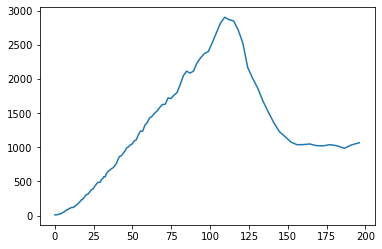

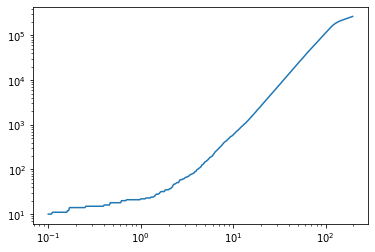

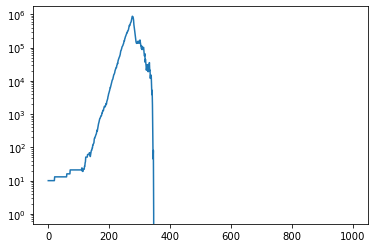

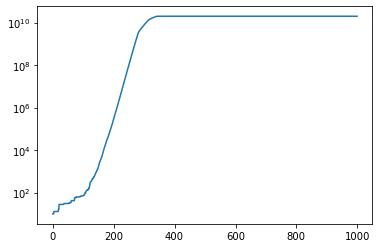

In [40]:
# print(moments)
active_moments, tracer_moments = extract_moments(moments)


plt.plot(active_moments[:300, 0], active_moments[:300, 2])
plt.show() 

plt.plot(tracer_moments[:300, 0], tracer_moments[:300, 2])
plt.yscale('log')
plt.xscale('log')
plt.show() 

plt.plot(active_moments[:, 3])
plt.yscale('log')
plt.show() 

plt.plot(tracer_moments[:, 3])
plt.yscale('log')
plt.show() 

In [15]:
times = [] 
msds = [] 
tot_edge_reach = 0 
tot_possible_edge = len(realisations)*4 
binder = np.zeros((N))

for (i, realisation) in enumerate(realisations):

    time, msd, edge_reach, coarse_grain_moments = extract_lite(realisation, N)
    times.append(time)
    msds.append(msd)
    tot_edge_reach += edge_reach 
    
    m2 = coarse_grain_moments[:, 2] 
    m4 = coarse_grain_moments[:, 4]
    binder = 1 - (m4/(3*m2*m2))
    
    print(binder)

[0.44541604 0.49141565 0.5228113  0.53892405 0.54270505 0.55013289
 0.55622488]
[0.5246332  0.56614806 0.59454186 0.60796028 0.61596372 0.6177799
 0.6174732 ]
[0.12965051 0.20282054 0.25665336 0.28191099 0.28763919 0.29170049
 0.27509463]
[0.51625205 0.55569832 0.58761713 0.60182817 0.60764199 0.61003547
 0.60269732]
[0.5171162  0.55735855 0.58599089 0.60234595 0.60985963 0.61211208
 0.6106654 ]
[0.57136829 0.6083121  0.63551294 0.64944402 0.65560196 0.65725867
 0.6643086 ]
[0.5450577  0.58424411 0.61218532 0.62266111 0.62884578 0.63702235
 0.64205477]
[0.58122018 0.61661755 0.64305112 0.65685313 0.66293664 0.66531617
 0.66640355]
[0.50076579 0.5443242  0.57389584 0.58876117 0.59352354 0.59248488
 0.5944682 ]
[0.56719584 0.60455329 0.63235154 0.64601149 0.65220621 0.65394448
 0.66197559]


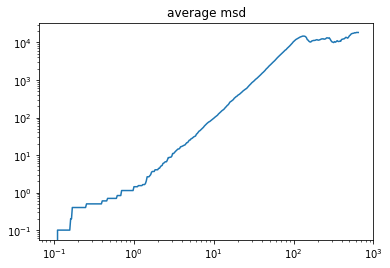

In [6]:
# plot average msd vs time 
t = select_longest(times)[:-1] 
mean_msd = np.mean(pad(msds), axis=0)
plt.title('average msd')
plt.plot(t, mean_msd)
plt.yscale('log')
plt.xscale('log')
plt.show() 

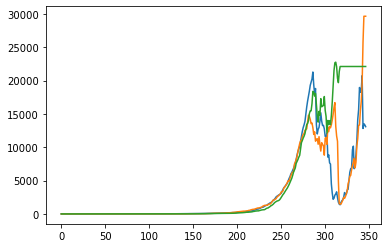

In [14]:
plt.plot(msds[0])
plt.plot(msds[1])
plt.plot(msds[2])
plt.show() 